# Checking and playing with NICER data
Looking through and plotting segment information from analyze_all_segments.py

In [1]:
import numpy as np
from astropy.table import Table, Column, unique, vstack
from astropy.time import Time
import os
# import subprocess
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator, FixedLocator
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.gridspec as gridspec
from matplotlib.colors import cnames as mcolors
from matplotlib._color_data import XKCD_COLORS as xkcdcolor
from scipy.stats import binned_statistic
# import matplotlib.patches as patches
# from matplotlib.collections import PatchCollection
from xcor_tools_nicer import find_nearest as find_nearest
from xcor_tools_nicer import clock_to_mjd as clock_to_mjd
font_prop = font_manager.FontProperties(size=20)
%matplotlib inline

In [2]:
homedir = os.path.expanduser("~")
exe_dir = os.getcwd()
print(exe_dir)
obj_name = "GX_339-4"
obj_prefix = "gx339-2021"

/Users/abbie/Documents/Research/NICER_exploration


In [12]:
## This seg_info_file was made in analyze_all_segments.py
seg_list_file = "%s/out/%s/%s_seg-info-list.txt" % (exe_dir, obj_name, obj_prefix)
seg_list = [line.strip() for line in open(seg_list_file)]
seg_list = seg_list[1:]
seg_tab = Table()
for seg_info_file in seg_list:
    temp_tab = Table.read(seg_info_file, format='ascii', 
                     names=('obsID', 'start_time', 'end_time', 
                            'total_rate', 'broad_rate', 'rms', 
                            'hard_rate', 'soft_rate', 'hr', 'fe62', 
                            'fe63', 'fe64', 'fe65', 'fe66'))
    seg_tab = vstack([seg_tab,temp_tab])
#     print(seg_tab)

In [13]:
## Unique obsIDs in this table
obsIDs = unique(seg_tab, keys='obsID')['obsID']
print("%d obsIDs" % len(obsIDs))
print(obsIDs)

1 obsIDs
obsID
-----
  666


In [14]:
times = seg_tab['start_time'] - seg_tab['start_time'][0]
times /= (60*60*24)  # now it's in days? elapsed
nanrms_mask = seg_tab['rms'] < 90.
seg_tab = seg_tab[nanrms_mask]
times = times[nanrms_mask]
mjdstart = Time(clock_to_mjd(seg_tab['start_time'][0]), format='mjd')
isostart = mjdstart.to_value('iso', 'date_hm')

In [15]:
binning_bins = np.arange(0,np.ceil(times[-1]),step=0.1)
bin_rate, bin_days, temp = binned_statistic(times, seg_tab['broad_rate'], statistic='mean', bins=binning_bins)
bin_hr, bin_days, temp = binned_statistic(times, seg_tab['hr'], statistic='mean', bins=binning_bins)
bin_rms, bin_days, temp = binned_statistic(times, seg_tab['rms'], statistic='mean', bins=binning_bins)
bin_fe62, bin_days, temp = binned_statistic(times, seg_tab['fe62'], statistic='mean', bins=binning_bins)
bin_fe63, bin_days, temp = binned_statistic(times, seg_tab['fe63'], statistic='mean', bins=binning_bins)
bin_fe64, bin_days, temp = binned_statistic(times, seg_tab['fe64'], statistic='mean', bins=binning_bins)
bin_fe65, bin_days, temp = binned_statistic(times, seg_tab['fe65'], statistic='mean', bins=binning_bins)
bin_fe66, bin_days, temp = binned_statistic(times, seg_tab['fe66'], statistic='mean', bins=binning_bins)

In [16]:
bin_fe = np.average([bin_fe62, bin_fe63, bin_fe64, bin_fe65, bin_fe66], axis=0)
print(np.shape(bin_fe))

(399,)


In [17]:
print("Rate: ", np.nanmin(bin_rate), np.nanmax(bin_rate))
print("HR: ", np.nanmin(bin_hr), np.nanmax(bin_hr))
print("rms: ", np.nanmin(bin_rms), np.nanmax(bin_rms))

Rate:  287.3007813333333 1696.0635416
HR:  0.0274648025 0.12314314999999998
rms:  0.0143796632 0.22712075420000005


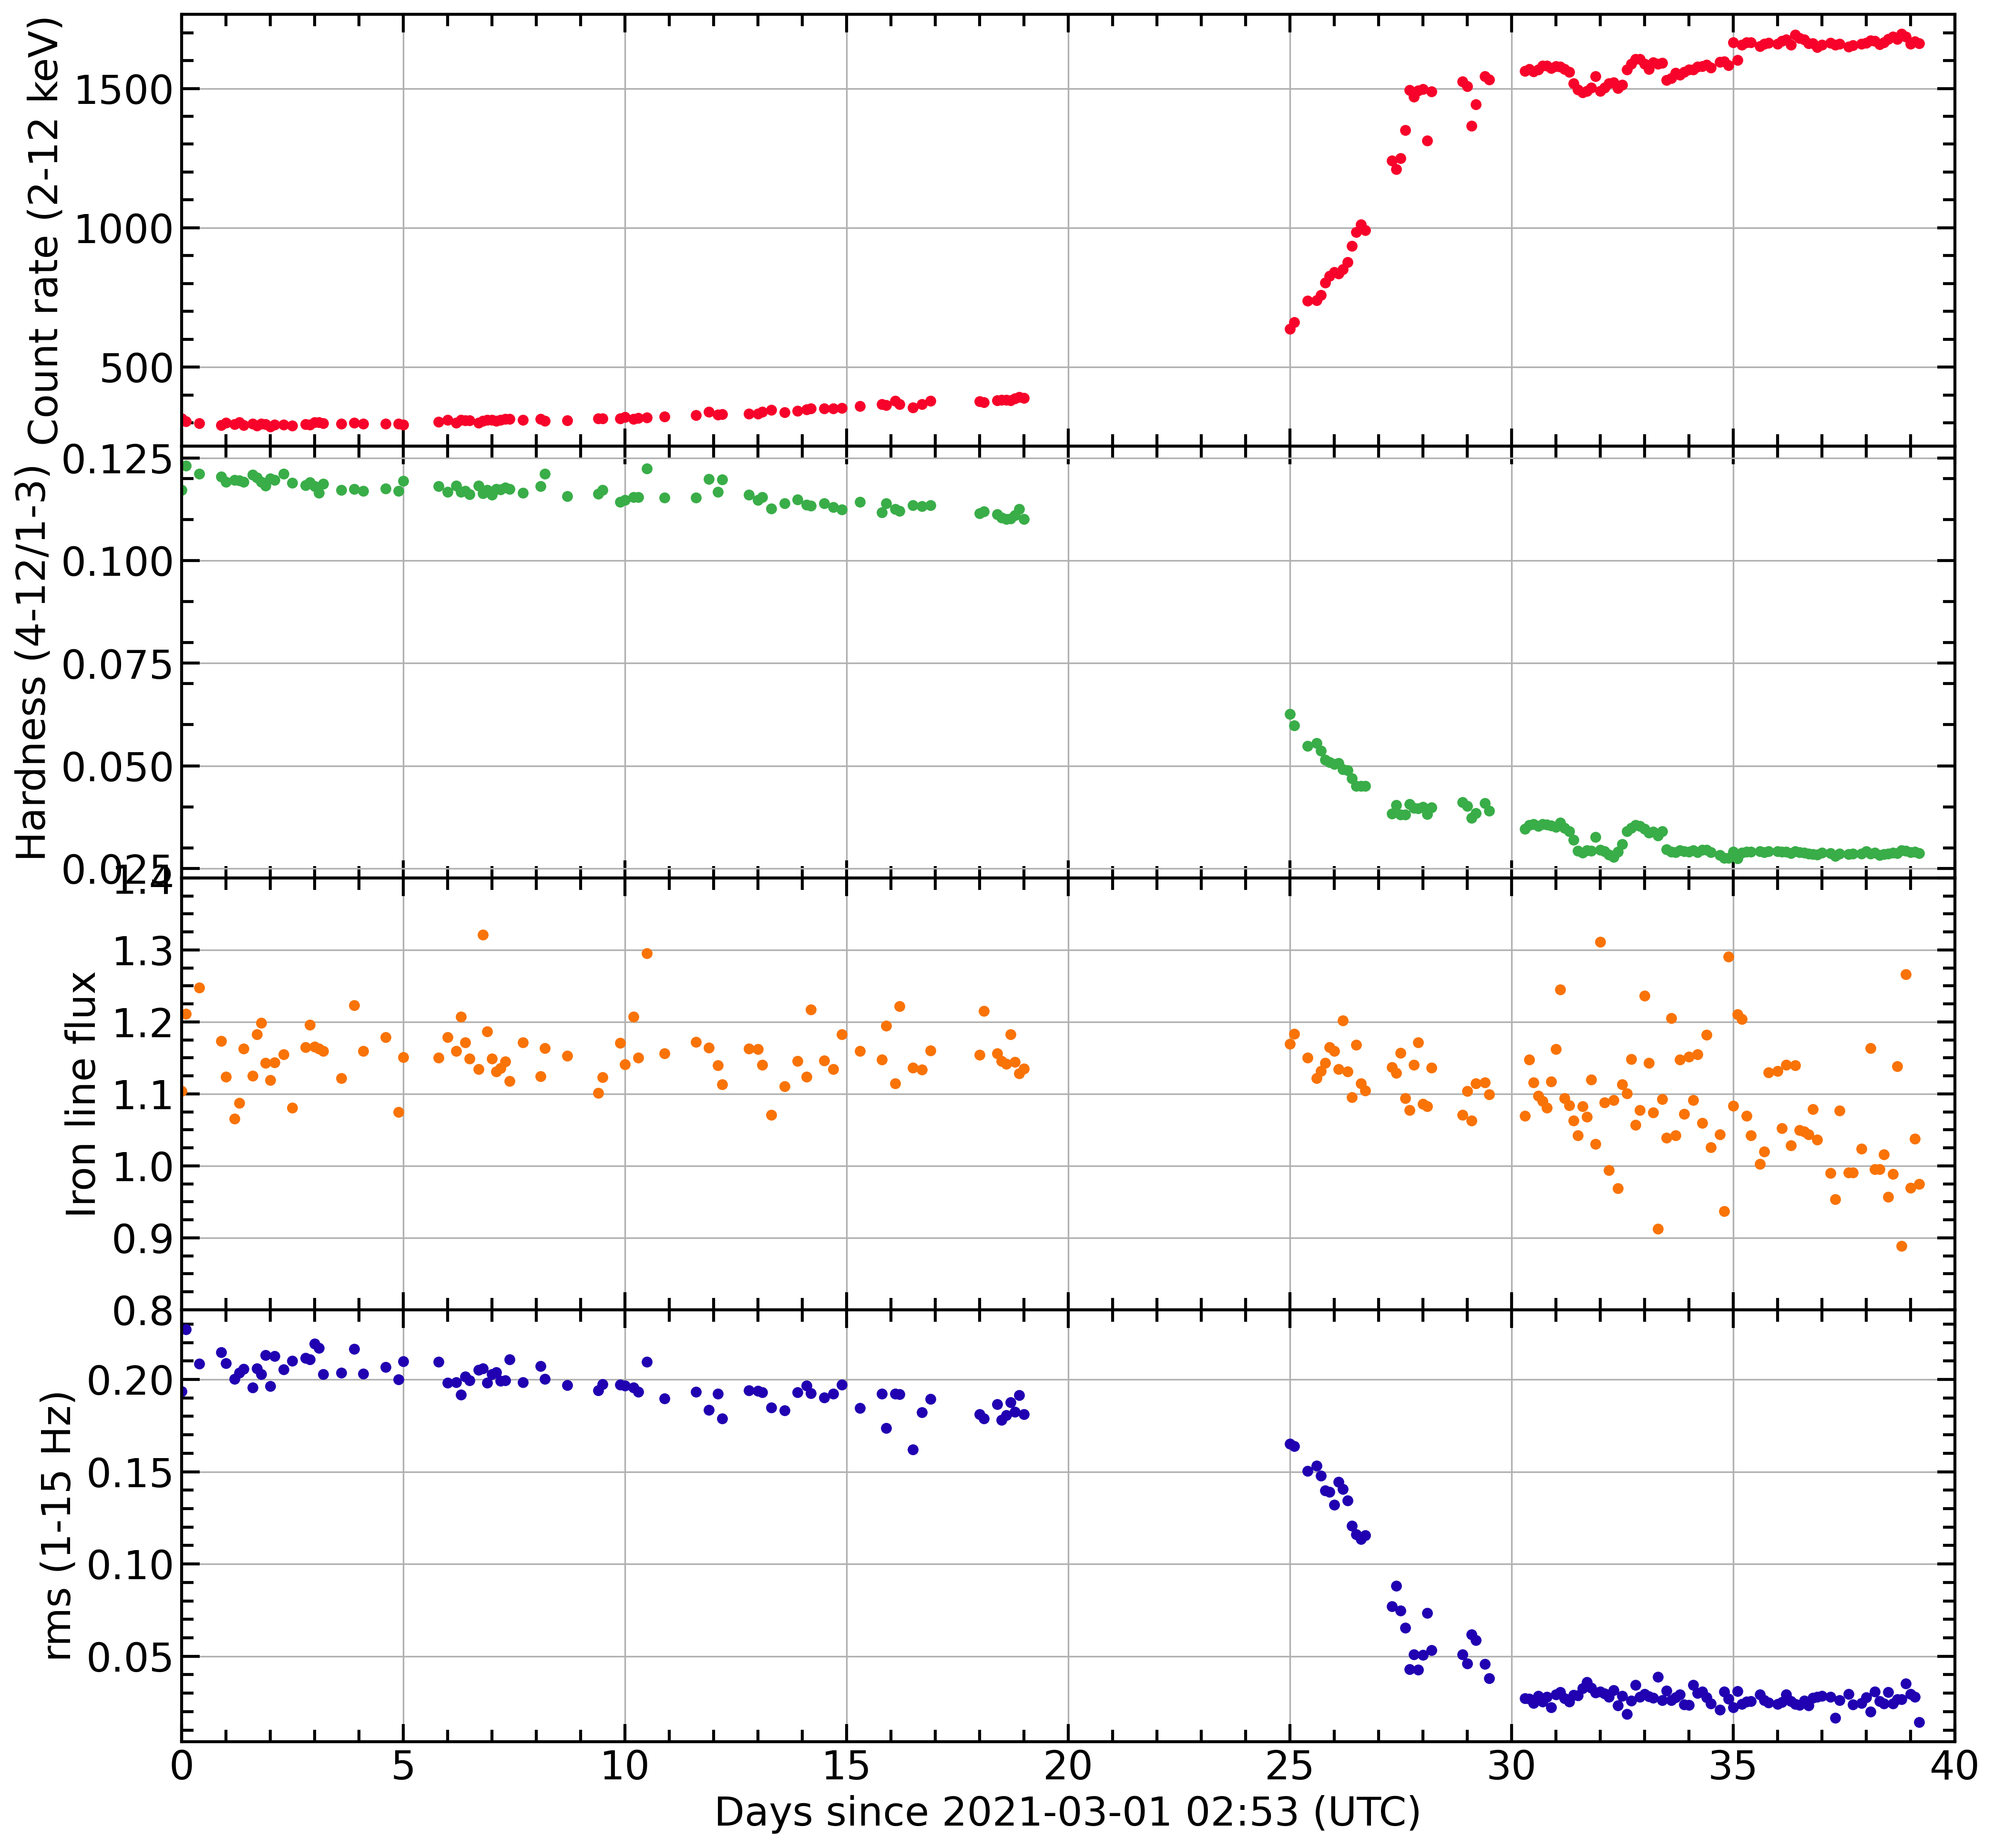

In [24]:
fig = plt.figure(figsize=(16, 16), dpi=300)
gs1 = gridspec.GridSpec(4, 1)
gs1.update(wspace=0.025, hspace=0.0)

ax1 = plt.subplot(gs1[0])
ax1.scatter(bin_days[:-1], bin_rate, marker='.', s=80, color=xkcdcolor['xkcd:cherry red'])
ax1.set_ylabel("Count rate (2-12 keV)", fontproperties=font_prop)
# ax1.set_ylim(20000, 67000)
ax1.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax1.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax1.tick_params(which='major', width=1.5, length=9, direction="in")
ax1.tick_params(which='minor', width=1.5, length=6, direction="in")
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_minor_locator(MultipleLocator(100))
ax1.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.xaxis.grid(True, which='major')
ax1.yaxis.grid(True, which='major')
ax1.set_axisbelow(True)

ax2 = plt.subplot(gs1[1], sharex=ax1)
ax2.scatter(bin_days[:-1], bin_hr, marker='.', s=80, color=xkcdcolor['xkcd:medium green'])
ax2.set_ylabel("Hardness (4-12/1-3)", fontproperties=font_prop)
# ax2.set_ylim(0.27, 0.85)
ax2.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax2.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax2.tick_params(which='major', width=1.5, length=9, direction="in")
ax2.tick_params(which='minor', width=1.5, length=6, direction="in")
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.xaxis.grid(True, which='major')
ax2.yaxis.grid(True, which='major')
ax2.set_axisbelow(True)

ax4 = plt.subplot(gs1[2], sharex=ax1)
ax4.scatter(bin_days[:-1], bin_fe, marker='.', s=80, color=xkcdcolor['xkcd:orange'])
# ax4.scatter(bin_days[:-1], bin_fe63, marker='.', s=80, color=xkcdcolor['xkcd:orange'])
# ax4.scatter(bin_days[:-1], bin_fe64, marker='.', s=80, color=xkcdcolor['xkcd:green'])
# ax4.scatter(bin_days[:-1], bin_fe65, marker='.', s=80, color=xkcdcolor['xkcd:blue'])
# ax4.scatter(bin_days[:-1], bin_fe66, marker='.', s=80, color=xkcdcolor['xkcd:purple'])
ax4.set_ylim(0.8, 1.4)
ax4.set_ylabel("Iron line flux", fontproperties=font_prop)
ax4.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax4.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax4.tick_params(which='major', width=1.5, length=9, direction="in")
ax4.tick_params(which='minor', width=1.5, length=6, direction="in")
ax4.xaxis.set_ticks_position('both')
ax4.yaxis.set_minor_locator(MultipleLocator(0.025))
ax4.yaxis.set_major_locator(MultipleLocator(0.1))
ax4.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax4.spines[axis].set_linewidth(1.5)
ax4.xaxis.grid(True, which='major')
ax4.yaxis.grid(True, which='major')
ax4.set_axisbelow(True)

ax3 = plt.subplot(gs1[3], sharex=ax1)
ax3.scatter(bin_days[:-1], bin_rms, marker='.', s=80, color=xkcdcolor['xkcd:ultramarine'])
ax3.set_xlabel("Days since %s (UTC)" % isostart, fontproperties=font_prop)
ax3.set_ylabel("rms (1-15 Hz)", fontproperties=font_prop)
# ax3.set_ylim(0.00, 0.16)
ax3.set_xlim(0,np.ceil(times[-1]))
# ax3.xaxis.set_minor_locator(MultipleLocator(1))
# ax3.set_xlim(0, 8e5)
ax3.xaxis.set_major_locator(MultipleLocator(5))
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax3.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax3.tick_params(which='major', width=1.5, length=9, direction="in")
ax3.tick_params(which='minor', width=1.5, length=6, direction="in")
ax3.xaxis.set_minor_formatter(NullFormatter())
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_minor_locator(MultipleLocator(0.01))
ax3.yaxis.set_major_locator(MultipleLocator(0.05))
ax3.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(1.5)
ax3.xaxis.grid(True, which='major')
ax3.yaxis.grid(True, which='major')
ax3.set_axisbelow(True)


plt.savefig("./out/%s/%s_outburst_lcs.pdf" % (obj_name, obj_prefix))
plt.show()

In [25]:
even_days = [i for i in range(0,int(np.ceil(times[-1])),2)]
# print(even_days)
even_idx = []
for the_day in even_days:
    temp, the_idx = find_nearest(bin_days, the_day)
#     print(the_day, temp, the_idx)
    even_idx.append(the_idx)
# print(the_idx)

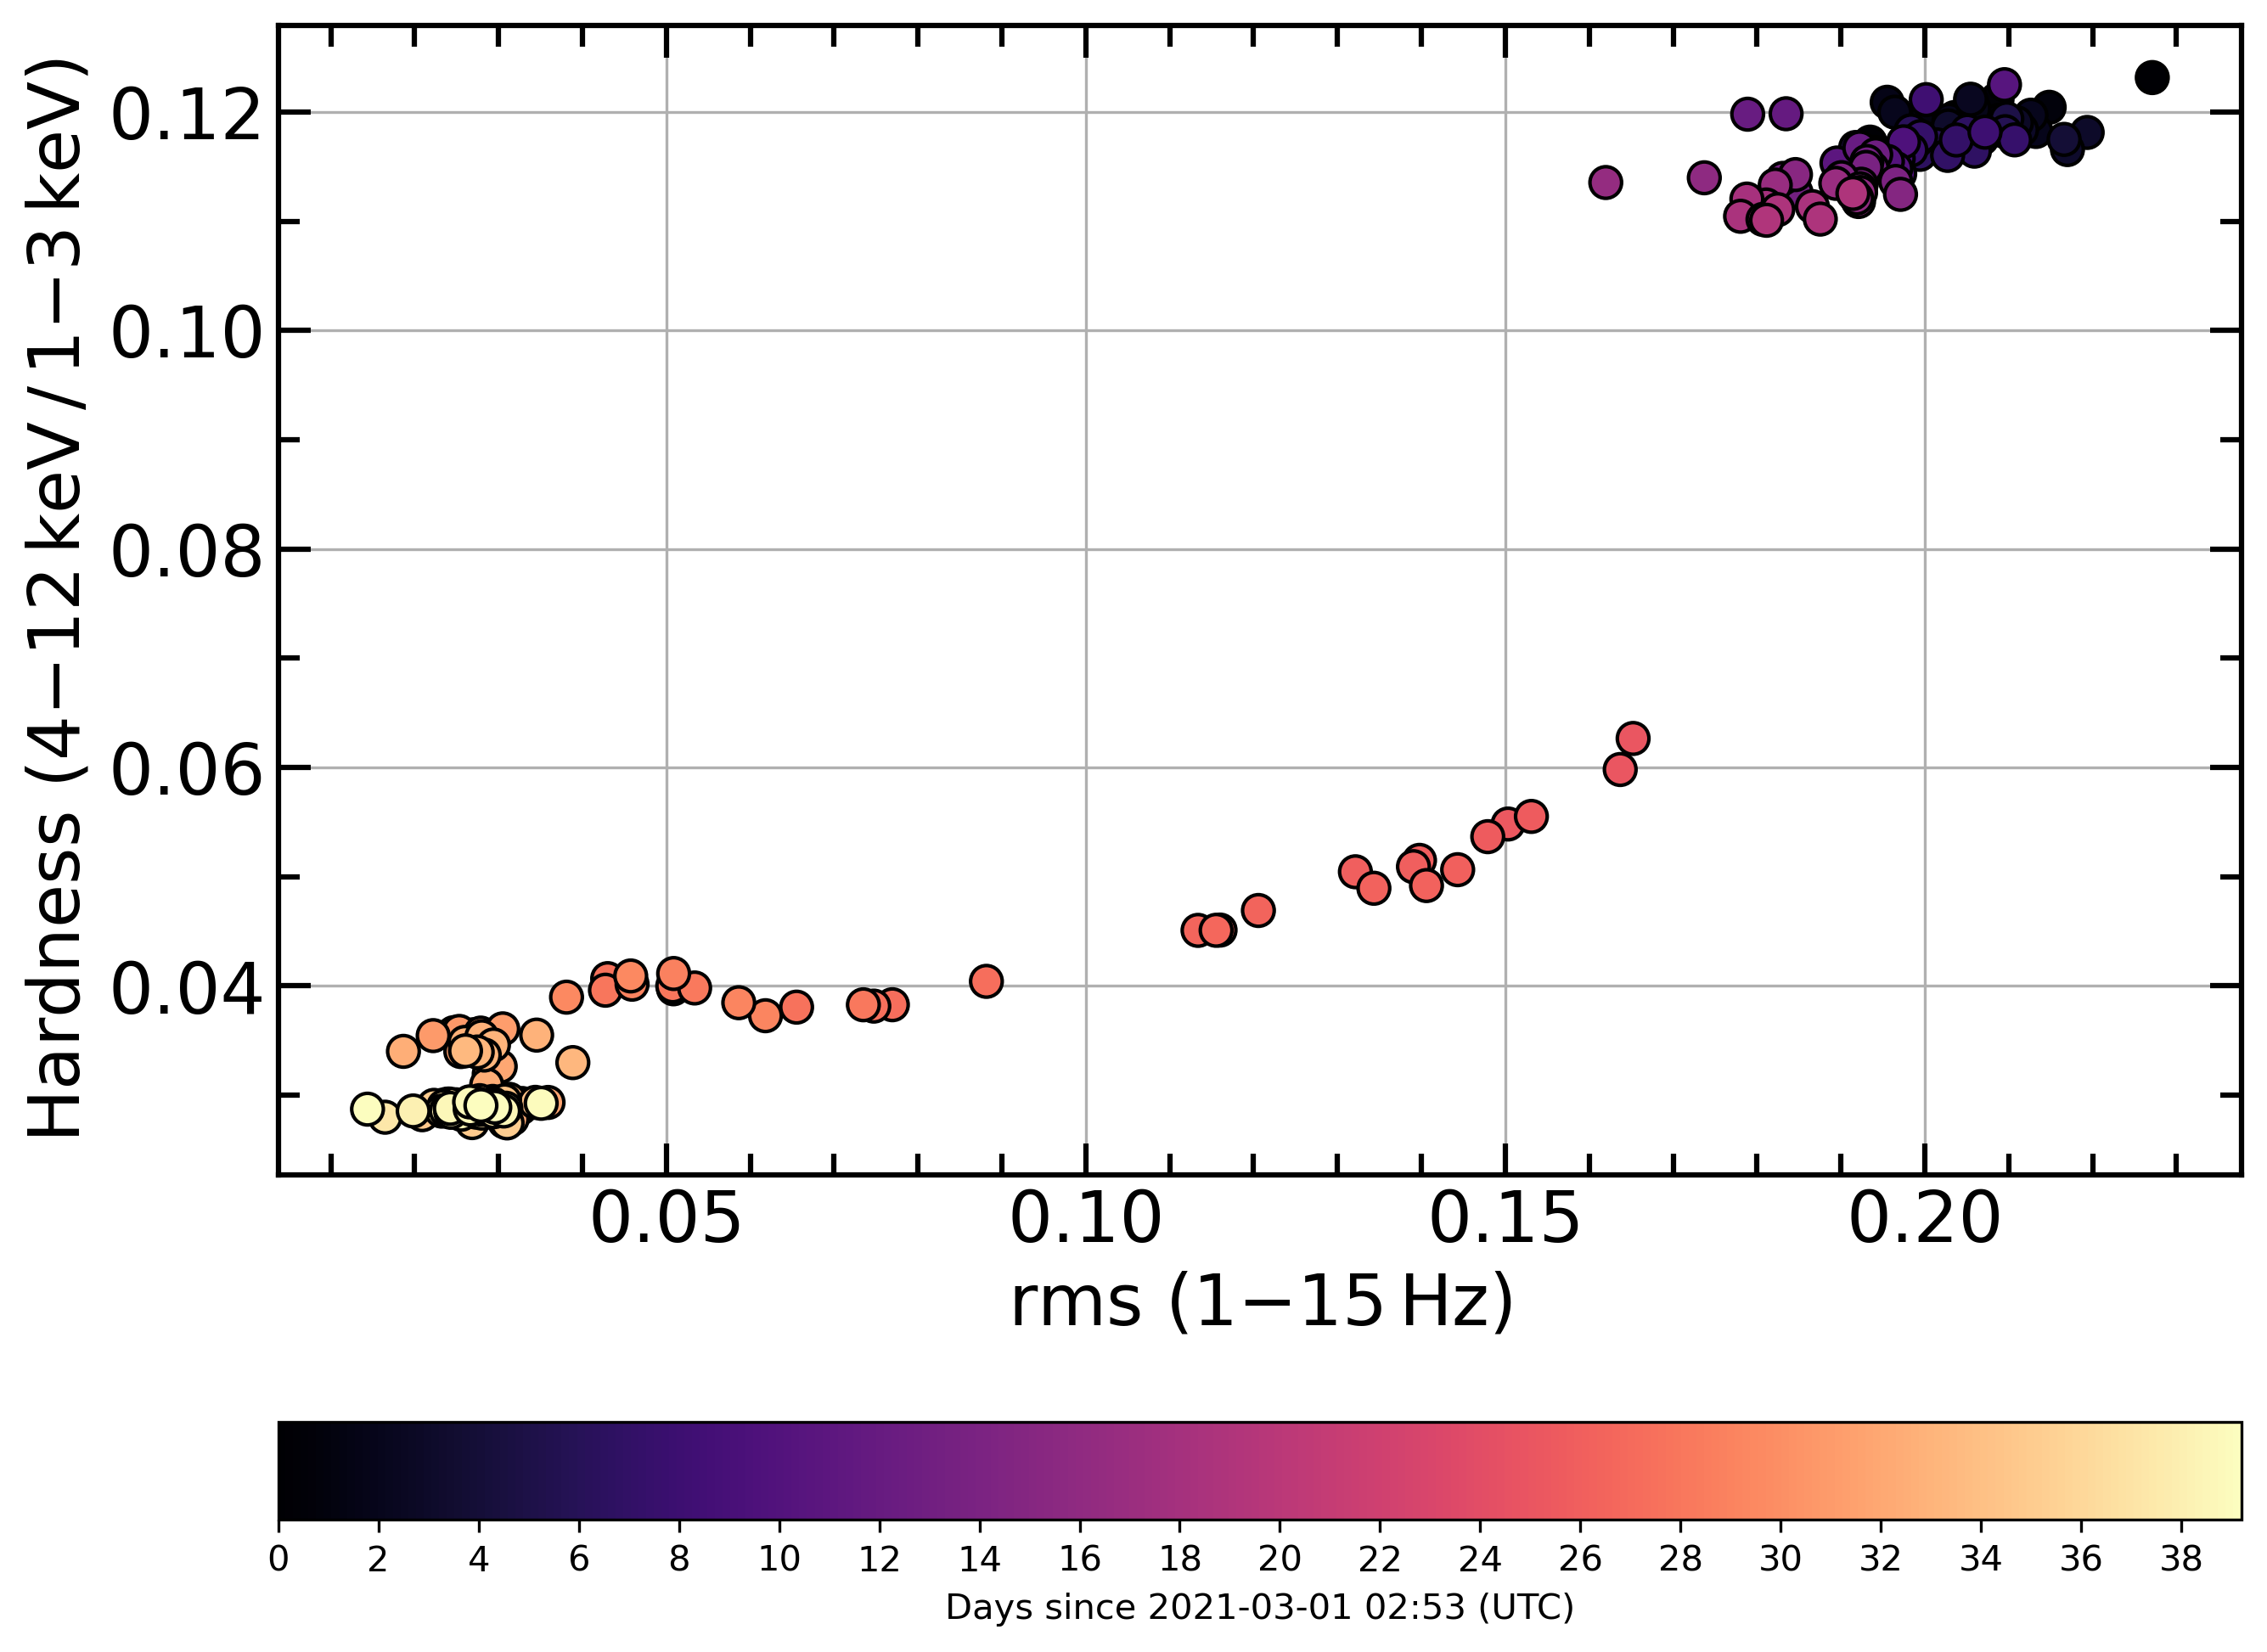

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6.75), dpi=300, tight_layout=True)
the_cbar = ax.scatter(bin_rms, bin_hr, marker='o', s=80, c=np.arange(len(bin_hr)), cmap='magma', edgecolor='black')
# ax.set_xlim(0.105, 0.20)
# ax.set_ylim(0.27, 0.85)
ax.set_xlabel(r"rms (1$-$15$\,$Hz)", fontproperties=font_prop)
ax.set_ylabel(r"Hardness (4$-$12$\,$keV$\,/\,$1$-$3$\,$keV)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax.tick_params(which='major', width=1.5, length=9, direction="in")
ax.tick_params(which='minor', width=1.5, length=6, direction="in")
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.set_axisbelow(True)
cbar=plt.colorbar(the_cbar, label="Days since %s (UTC)" % isostart, orientation="horizontal")
cbar.set_ticks(even_idx)
cbar.set_ticklabels(even_days)
plt.savefig("./out/%s/%s_rms-hr.pdf" % (obj_name, obj_prefix))
plt.show()

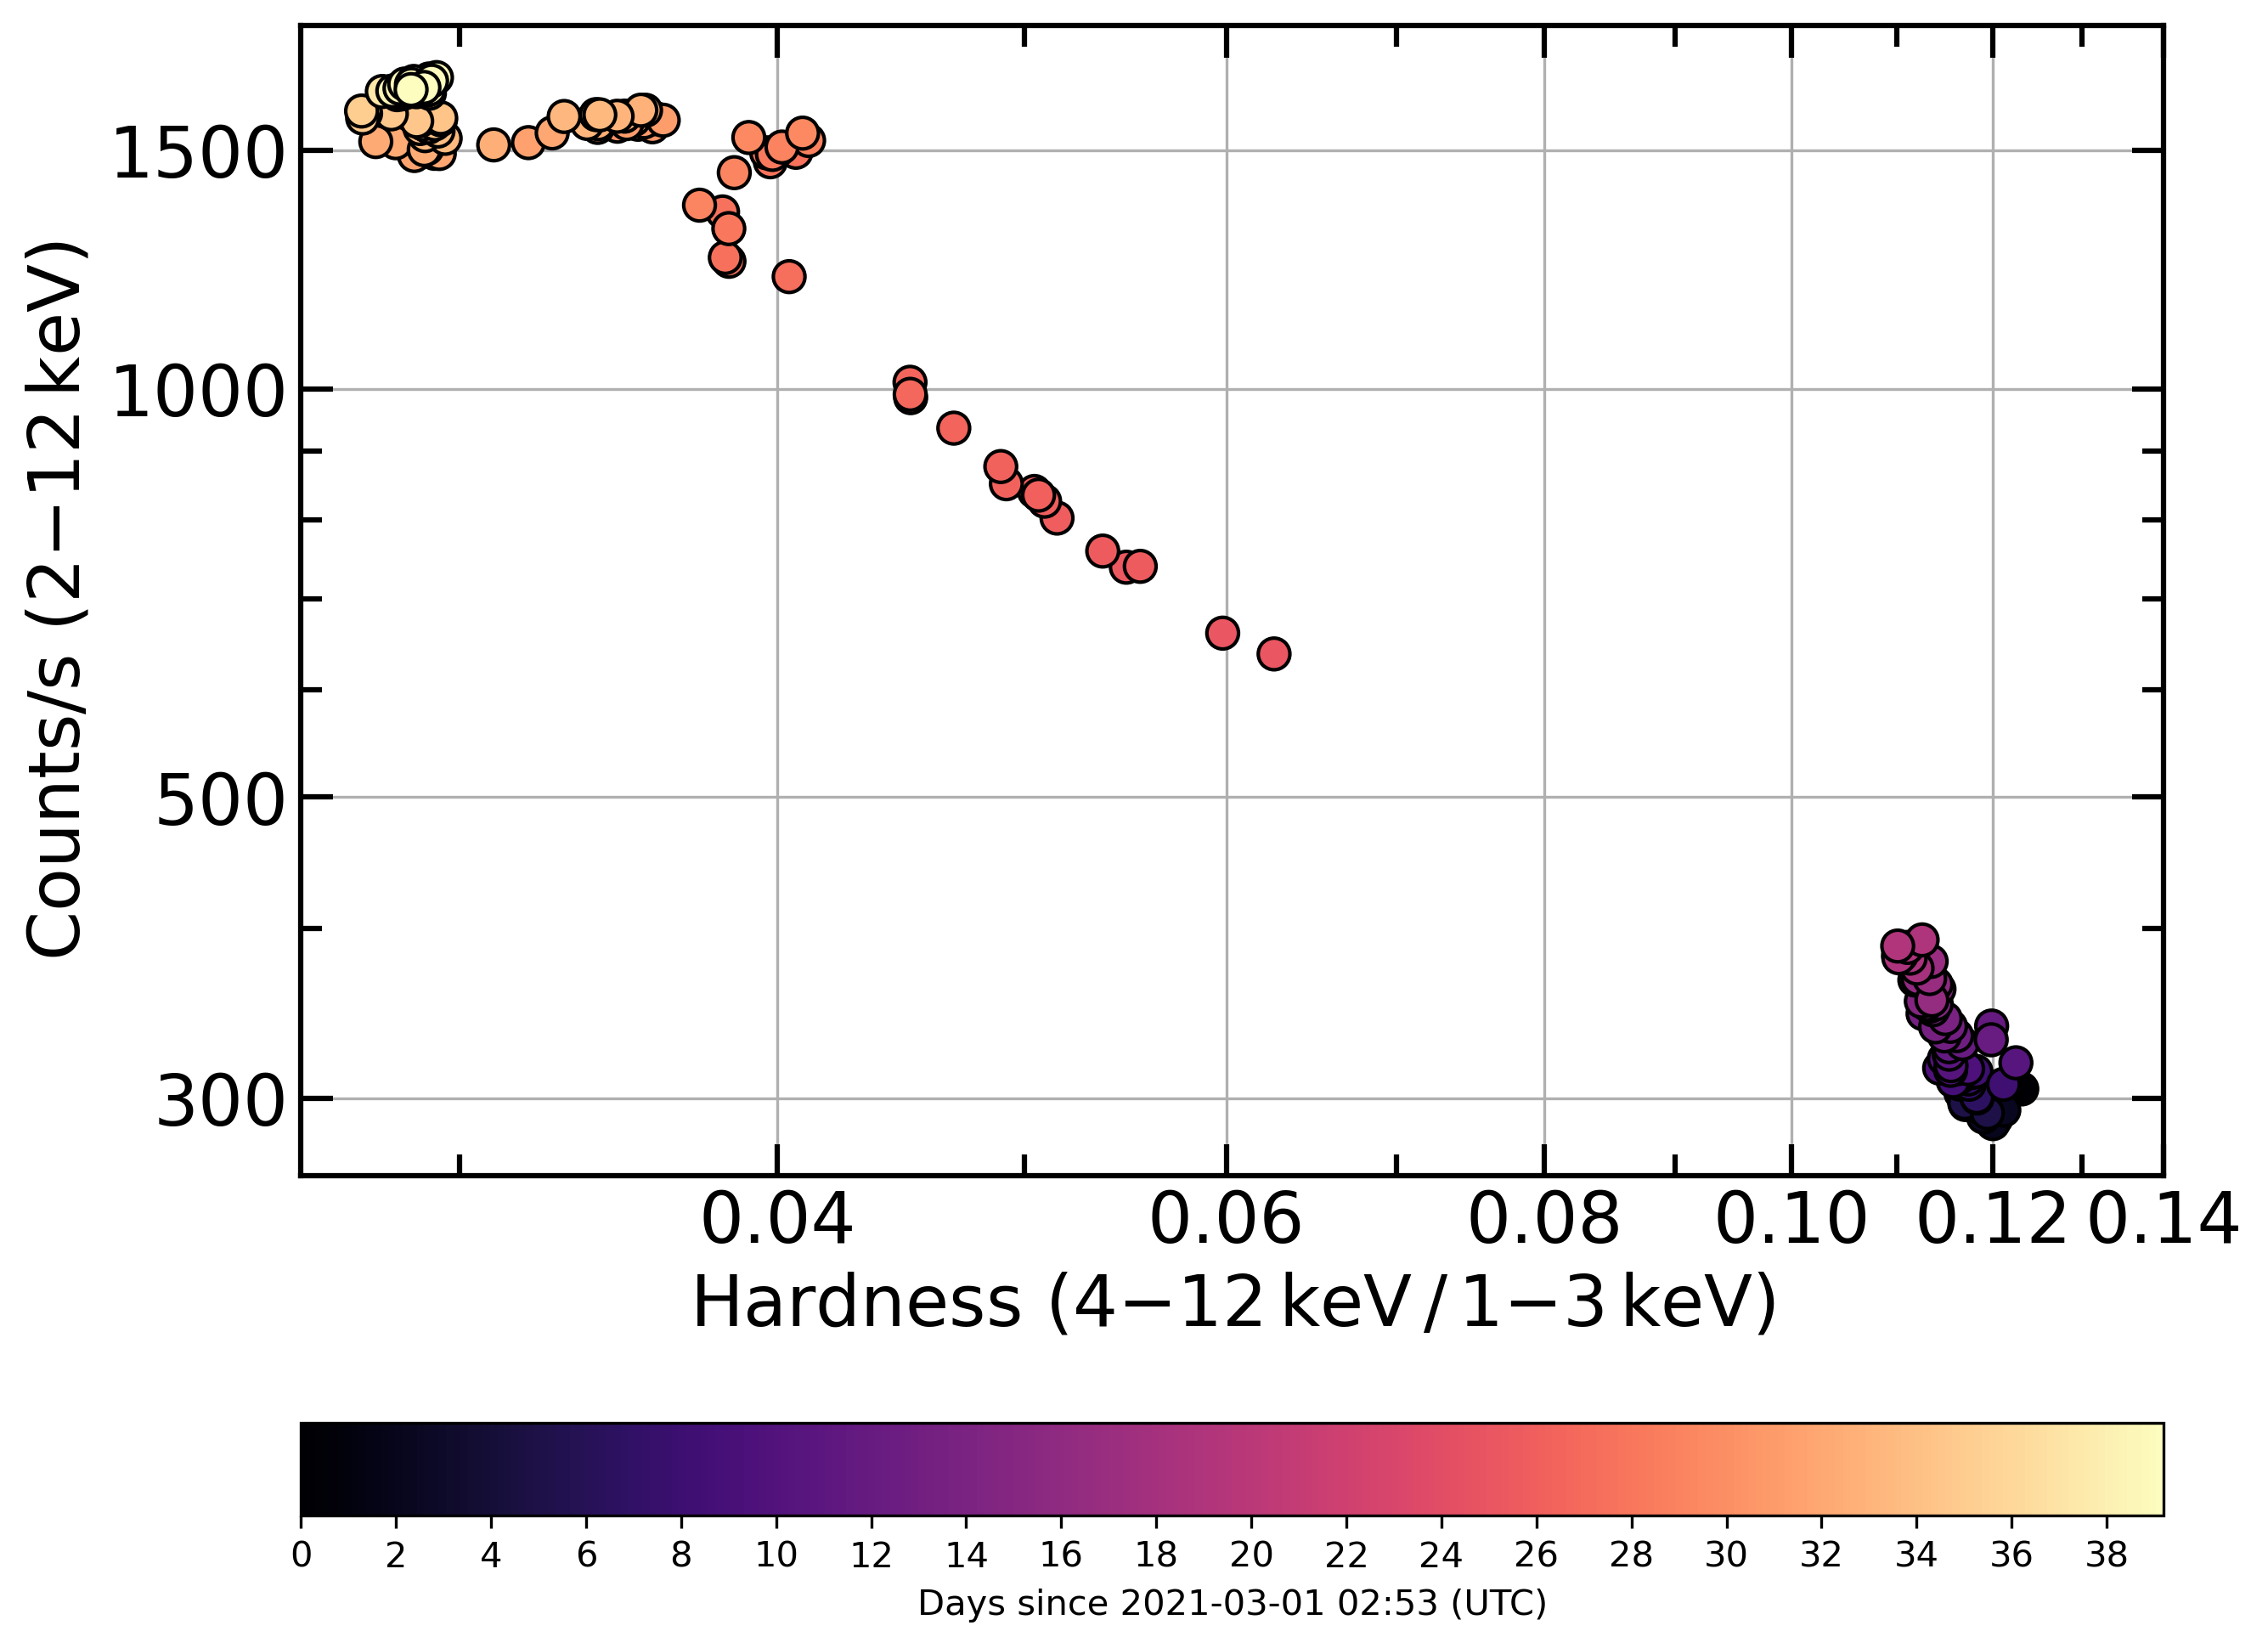

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6.75), dpi=300, tight_layout=True)
the_cbar = ax.scatter(bin_hr, bin_rate, marker='o', s=80, c=np.arange(len(bin_hr)), cmap='magma', edgecolor='black')
ax.set_xlabel(r"Hardness (4$-$12$\,$keV$\,/\,$1$-$3$\,$keV)", fontproperties=font_prop)
ax.set_ylabel(r"Counts/s (2$-$12$\,$keV)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax.tick_params(which='major', width=1.5, length=9, direction="in")
ax.tick_params(which='minor', width=1.5, length=6, direction="in")
ax.set_xlim(0.026, 0.14)
ax.xaxis.set_major_locator(MultipleLocator(0.02))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(FixedLocator([300, 500, 1000, 1500]))
ax.set_yticklabels(["300", "500", "1000", "1500"])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.set_axisbelow(True)
cbar=plt.colorbar(the_cbar, label="Days since %s (UTC)" % isostart, orientation="horizontal")
cbar.set_ticks(even_idx)
cbar.set_ticklabels(even_days)
plt.savefig("./out/%s/%s_hid.pdf" % (obj_name, obj_prefix))
plt.show()

In [9]:
# ## Filtering seg_tab
# time_mask = seg_tab['start_time'] <= 119138417.0
# filt_tab = seg_tab[time_mask]
# # print(filt_tab)
# hr_mask = (filt_tab['hr'] < 0.031) & (filt_tab['hr'] > 0.021)
# # hr_mask = (filt_tab['hr'] > 0.031) & (filt_tab['hr'] < 0.05)
# filt_tab = filt_tab[hr_mask]
# # print(filt_tab)
# rms_mask = filt_tab['rms'] < 0.041
# filt_tab = filt_tab[rms_mask]
# # print(filt_tab)

In [49]:
# ## These ones have the criteria I want from the cell above
# good_obsIDs = unique(filt_tab, keys='obsID')['obsID']
# print("%d good obsIDs" % len(good_obsIDs))
# print(good_obsIDs)